`ApJdataFrames` Cottaar_2014
---
`Title`: IN-SYNC I: Homogeneous Stellar Parameters from High-resolution APOGEE Spectra for Thousands of Pre-main Sequence Stars  
`Authors`: Michiel Cottaar, Kevin R Covey, Michael R Meyer, David L Nidever, Keivan G. Stassun, Jonathan B Foster, Jonathan C Tan, S Drew Chojnowski, Nicola da Rio, Kevin M Flaherty, Peter M Frinchaboy, Michael Skrutskie, Steven R Majewski, John C Wilson, and Gail Zasowski  

Data is from this paper:  
http://iopscience.iop.org/article/10.1088/0004-637X/794/2/125/meta

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = 150

In [2]:
import astropy

In [3]:
from astropy.io import fits
hdulist1 = fits.open('../data/Cottaar2014/per_epoch.fit')
hdulist2 = fits.open('../data/Cottaar2014/per_star.fit')

In [4]:
table1 = hdulist1[1]

In [5]:
table1.columns

ColDefs(
    name = '2MASS'; format = '20A'
    name = 'date'; format = 'E'
    name = 'S/N'; format = 'E'
    name = 'Teff'; format = 'E'
    name = 'sig_Teff'; format = 'E'
    name = 'eta_Teff'; format = 'E'
    name = 'log(g)'; format = 'E'
    name = 'sig_log(g)'; format = 'E'
    name = 'eta_log(g)'; format = 'E'
    name = 'vsini'; format = 'E'
    name = 'sig_vsini'; format = 'E'
    name = 'eta_vsini'; format = 'E'
    name = 'R_H'; format = 'E'
    name = 'sig_R_H'; format = 'E'
    name = 'eta_R_H'; format = 'E'
)

In [6]:
table1.data.shape

(3003,)

In [7]:
table1.size

228228

In [8]:
table1

In [9]:
from astropy.table import Table

In [10]:
tt = Table(data=table1.data)

tt.write('../data/Cottaar2014/per_epoch.csv', format='csv')

dat = pd.read_csv('../data/Cottaar2014/per_epoch.csv')

In [11]:
dat.head()

,2MASS,date,S/N,Teff,sig_Teff,eta_Teff,log(g),sig_log(g),eta_log(g),vsini,sig_vsini,eta_vsini,R_H,sig_R_H,eta_R_H
0,2M03391582+3124306,2456169.0,20.640400,3525.389893,69.249603,0.483759,3.772381,0.189915,-0.367382,21.626106,2.602700,0.742116,0.524537,0.135287,-0.459976
1,2M03391582+3124306,2456173.0,20.839701,3511.069336,59.976250,0.311854,3.919029,0.220840,0.389681,20.478422,2.778543,0.257670,0.665639,0.173122,0.495296
2,2M03391582+3124306,2456675.5,19.124100,3632.849854,93.598015,1.532931,4.374870,0.221589,2.554291,16.485289,2.256506,-1.576832,0.506673,0.115694,-0.719942
3,2M03391582+3124306,2456562.0,8.898240,3745.674805,216.315414,1.171043,4.185779,0.530020,0.663133,16.531729,8.050102,-0.407537,0.971413,0.401513,0.973834
4,2M03391582+3124306,2456283.5,20.483299,3556.395752,91.700180,0.705265,3.949329,0.284949,0.405249,20.004354,3.433231,0.062827,0.782158,0.206663,0.988735


In [12]:
dat.columns

Index(['2MASS', 'date', 'S/N', 'Teff', 'sig_Teff', 'eta_Teff', 'log(g)',
       'sig_log(g)', 'eta_log(g)', 'vsini', 'sig_vsini', 'eta_vsini', 'R_H',
       'sig_R_H', 'eta_R_H'],
      dtype='object')

In [13]:
sns.set_context('talk', font_scale=1.0)

In [14]:
%config InlineBackend.figure_format = 'svg'

In [15]:
dat.columns

Index(['2MASS', 'date', 'S/N', 'Teff', 'sig_Teff', 'eta_Teff', 'log(g)',
       'sig_log(g)', 'eta_log(g)', 'vsini', 'sig_vsini', 'eta_vsini', 'R_H',
       'sig_R_H', 'eta_R_H'],
      dtype='object')

In [16]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

(5.5, 2.7)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


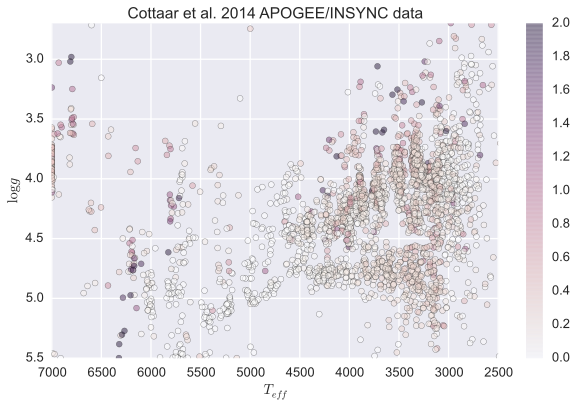

In [17]:
plt.figure(figsize=[10, 6])
sc = plt.scatter(dat['Teff'], dat['log(g)'], c=dat['R_H'], vmin=0, vmax=2, s=35, cmap=cmap, alpha=0.5)
plt.colorbar(sc)
plt.xlabel('$T_{eff}$')
plt.ylabel('$\log{g}$')
plt.title('Cottaar et al. 2014 APOGEE/INSYNC data')
plt.xlim(7000, 2500)
plt.ylim(5.5, 2.7)

In [18]:
import numpy as np

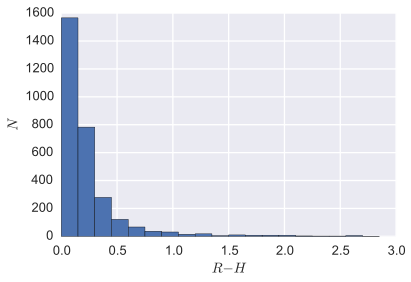

In [19]:
plt.figure(figsize=[6, 4])
plt.hist(dat['R_H'], bins=np.arange(0, 3, 0.15));
plt.xlabel('$R-H$')
plt.ylabel('$N$')

Find a source with specific properties.

In [20]:
Tfi = (dat.Teff > 4000) & (dat.Teff < 4200) 
lgi = (dat['log(g)'] > 3.5) & (dat['log(g)'] < 4.0)

gi = Tfi & lgi

In [21]:
dat.shape

(3003, 15)

In [22]:
gi.sum()

12

In [23]:
dat['2MASS'][gi]

195     2M03415745+3148365
196     2M03415745+3148365
197     2M03415745+3148365
1103    2M03435964+3201539
1239    2M03440920+3202376
2887    2M03474160+3251437
2897    2M03474711+3304034
2900    2M03474711+3304034
2901    2M03474711+3304034
2902    2M03474711+3304034
2906    2M03474711+3304034
2908    2M03474711+3304034
Name: 2MASS, dtype: object

# Per star observations (this is actually what we wanted).

In [24]:
table2 = hdulist2[1]

In [25]:
table2.columns

ColDefs(
    name = '2MASS'; format = '20A'
    name = 'RA(deg)'; format = 'E'
    name = 'Dec(deg)'; format = 'E'
    name = 'Cluster'; format = '15A'
    name = 'N(epochs)'; format = 'I'
    name = 'baseline(days)'; format = 'E'
    name = 'S/N'; format = 'E'
    name = 'Teff'; format = 'E'
    name = 'sig_Teff'; format = 'E'
    name = 'P(cnst_Teff)'; format = 'E'
    name = 'log(g)'; format = 'E'
    name = 'sig_log(g)'; format = 'E'
    name = 'P(cnst_log(g))'; format = 'E'
    name = 'vsini'; format = 'E'
    name = 'sig_vsini'; format = 'E'
    name = 'P(cnst_vsini)'; format = 'E'
    name = 'R_H'; format = 'E'
    name = 'sig_R_H'; format = 'E'
    name = 'P(cnst_R_H)'; format = 'E'
    name = '2MASS_J'; format = 'E'
    name = '2MASS_H'; format = 'E'
    name = '2MASS_Ks'; format = 'E'
    name = 'E(J-H)'; format = 'E'
    name = 'extinction-corrected_J'; format = 'E'
)

In [26]:
table2.data.shape

(607,)

In [27]:
t2 = Table(data=table2.data)

t2.write('../data/Cottaar2014/per_star.csv', format='csv')

data = pd.read_csv('../data/Cottaar2014/per_star.csv')

In [28]:
data.head()

,2MASS,RA(deg),Dec(deg),Cluster,N(epochs),baseline(days),S/N,Teff,sig_Teff,P(cnst_Teff),log(g),sig_log(g),P(cnst_log(g)),vsini,sig_vsini,P(cnst_vsini),R_H,sig_R_H,P(cnst_R_H),2MASS_J,2MASS_H,2MASS_Ks,E(J-H),extinction-corrected_J
0,2M03391582+3124306,54.815937,31.408524,IC 348,13,506.623871,67.377586,3493.808350,23.098995,0.732105,3.837330,0.069383,0.633982,19.795029,0.828311,0.979620,0.583012,0.046278,0.980708,14.286,12.740,11.854,0.925192,11.769479
1,2M03400150+3110172,55.006275,31.171461,IC 348,13,506.623871,107.531921,4030.904297,8.675797,0.166944,4.314396,0.026611,0.888585,19.388052,0.373202,0.960949,0.125638,0.010230,0.970222,14.012,12.560,11.938,0.799058,11.838562
2,2M03400478+3154148,55.020180,31.904043,IC 348,13,506.623871,145.604431,5724.558105,15.291853,0.272927,5.495738,0.005618,0.996091,1.894824,0.533520,0.087326,0.001011,0.001772,1.000000,12.838,11.750,11.380,0.821637,10.603148
3,2M03401184+3155233,55.049362,31.923141,IC 348,13,506.623871,170.603745,5691.615723,14.271509,0.999997,4.006762,0.030893,0.109032,1.785676,0.442818,0.006363,0.047081,0.008922,0.880311,13.061,11.860,11.421,0.926740,10.540267
4,2M03402639+2405238,55.109978,24.089958,Pleiades,3,7.018870,58.857182,3578.092529,22.311775,0.657795,4.610376,0.075095,0.987093,33.577209,1.098320,0.938106,0.216381,0.028686,0.344423,12.618,11.943,11.685,0.048047,12.487312


In [29]:
data.Cluster.unique()

array(['IC 348', 'Pleiades'], dtype=object)

In [30]:
data.columns

Index(['2MASS', 'RA(deg)', 'Dec(deg)', 'Cluster', 'N(epochs)',
       'baseline(days)', 'S/N', 'Teff', 'sig_Teff', 'P(cnst_Teff)', 'log(g)',
       'sig_log(g)', 'P(cnst_log(g))', 'vsini', 'sig_vsini', 'P(cnst_vsini)',
       'R_H', 'sig_R_H', 'P(cnst_R_H)', '2MASS_J', '2MASS_H', '2MASS_Ks',
       'E(J-H)', 'extinction-corrected_J'],
      dtype='object')

In [31]:
ic = data.Cluster == 'IC 348'
pl = data.Cluster == 'Pleiades'

Read in the Chabrier and Baraffe models

In [32]:
bcah = pd.read_csv('../data/BCAH2002/BCAH2002_isochrones.csv', sep = '\t')
groups =bcah.groupby(by='Age')

(5.5, 2.7)

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


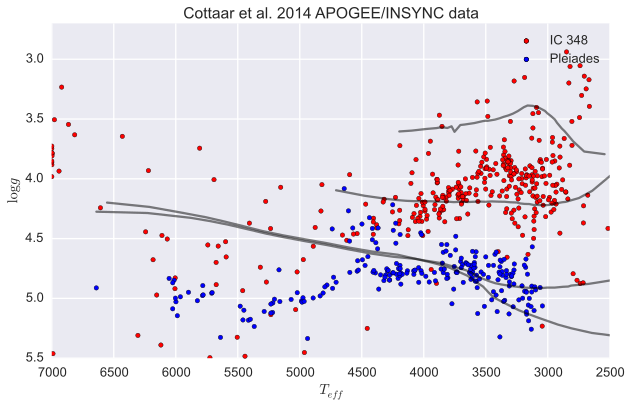

In [33]:
plt.figure(figsize=[10, 6])
plt.scatter(data['Teff'][ic], data['log(g)'][ic], label='IC 348', c='r')
plt.scatter(data['Teff'][pl], data['log(g)'][pl], label='Pleiades')
plt.xlabel('$T_{eff}$')
plt.ylabel('$\log{g}$')
plt.title('Cottaar et al. 2014 APOGEE/INSYNC data')
plt.legend(loc='best')

for age, group in groups:
    no_decimal = np.abs(np.mod(age, 1)) <0.001
    if no_decimal:
        plt.plot(group.Teff, group.logg, 'k-', alpha=0.5, label='{:0.1f} Myr'.format(age))

plt.xlim(7000, 2500)
plt.ylim(5.5, 2.7)

In [34]:
data.columns

Index(['2MASS', 'RA(deg)', 'Dec(deg)', 'Cluster', 'N(epochs)',
       'baseline(days)', 'S/N', 'Teff', 'sig_Teff', 'P(cnst_Teff)', 'log(g)',
       'sig_log(g)', 'P(cnst_log(g))', 'vsini', 'sig_vsini', 'P(cnst_vsini)',
       'R_H', 'sig_R_H', 'P(cnst_R_H)', '2MASS_J', '2MASS_H', '2MASS_Ks',
       'E(J-H)', 'extinction-corrected_J'],
      dtype='object')

In [35]:
data.shape

(607, 24)

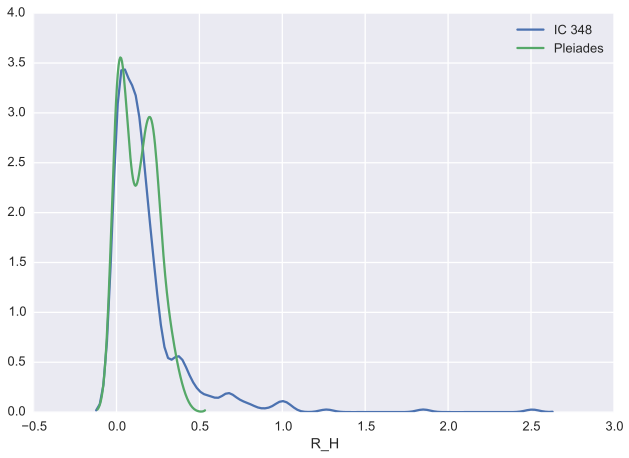

In [48]:
sns.distplot(data['R_H'][ic], hist=False, label='IC 348')
sns.distplot(data['R_H'][pl], hist=False, label='Pleiades')